In [711]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set()
sns.set_style('white')

### Data Loading 

In [838]:
data_path = '../data/data_by_group/'
data_list = ['1','2','3','4','5']
start_date = '2005-01-01'
end_date = '2020-03-26'
# end_date = '2016-01-01'

In [839]:
def load_data(file_path,rating_class,start_date,end_date):
    path = file_path+str(rating_class)+'/'
    files = os.listdir(path)
    output_path='../data/rating_class_%s.csv'%str(rating_class)
    result_df = None
    for i in range(len(files)):
        data_path = path+files[i]
        temp_df = pd.read_csv(data_path, index_col=0, parse_dates=True)

        temp_df = temp_df[start_date:end_date]

        result_df=pd.concat([result_df, temp_df], axis=1)
    
    result_df /= 100
    result_df = result_df.sort_index(axis=1).fillna(method='ffill')
    result_df.to_csv(output_path, index=True)
    
    return result_df

In [840]:
rating_1_df = load_data(data_path,1,start_date,end_date)
rating_2_df = load_data(data_path,2,start_date,end_date)
rating_3_df = load_data(data_path,3,start_date,end_date)
rating_4_df = load_data(data_path,4,start_date,end_date)
rating_5_df = load_data(data_path,5,start_date,end_date)

In [841]:
del rating_1_df['BlackRock Inc']

In [842]:
del rating_1_df['MutualFirst Financial Inc']

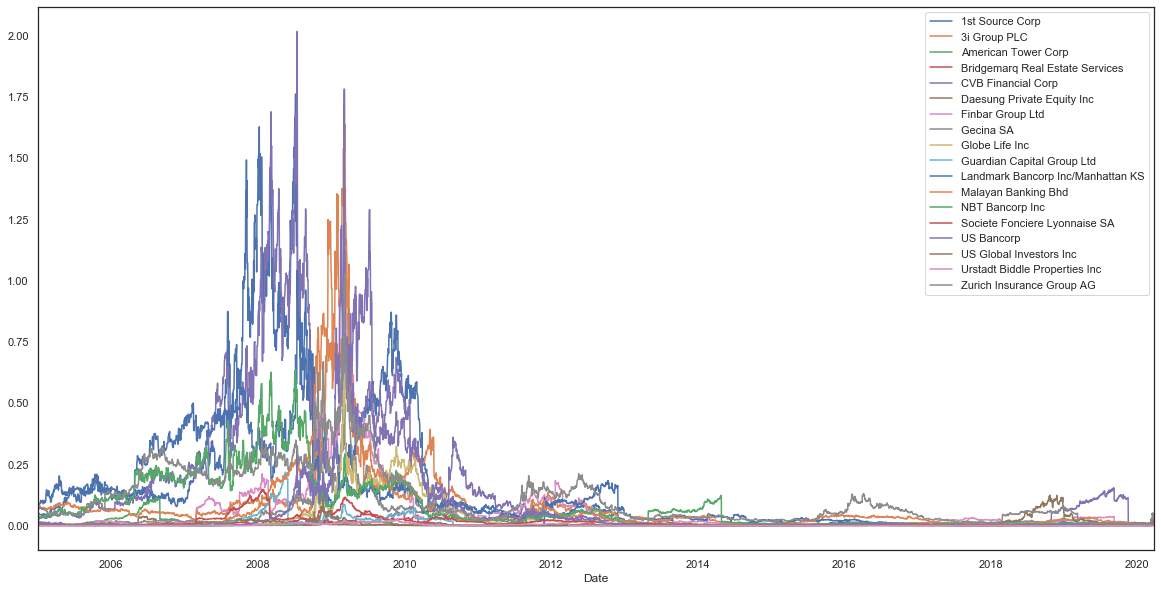

In [843]:
rating_1_df.plot(figsize=(20,10))

In [844]:
del rating_2_df['CRED Holding Co Ltd']

In [845]:
del rating_2_df['Southside Bancshares Inc']

In [846]:
del rating_2_df['FRACTALE Corp']

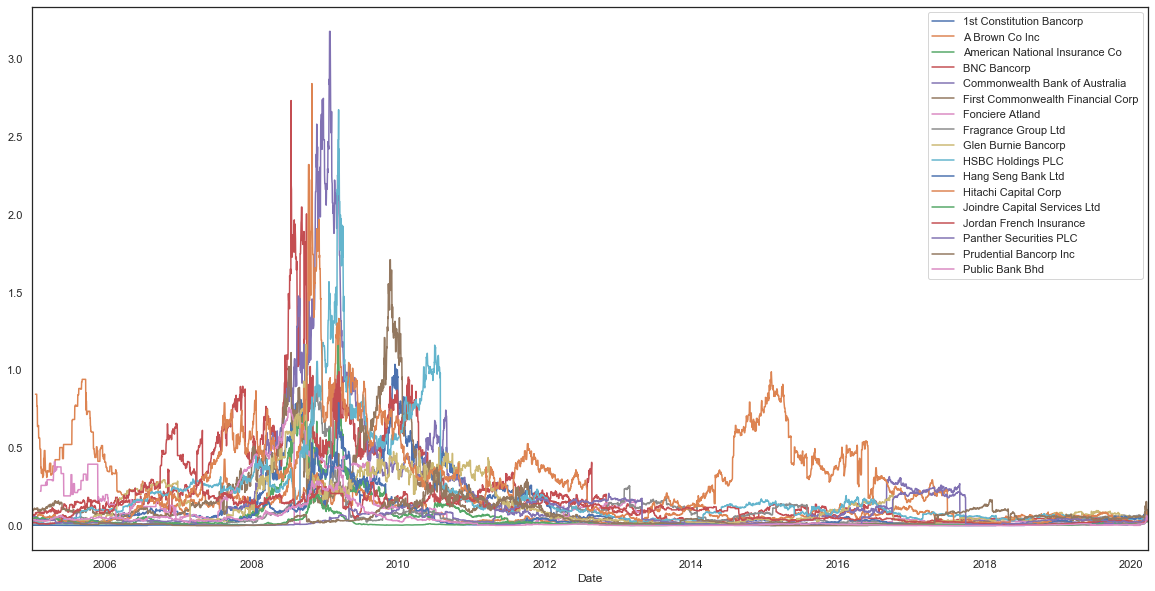

In [847]:
rating_2_df.plot(figsize=(20,10))

In [848]:
del rating_3_df['SK Securities Co Ltd']

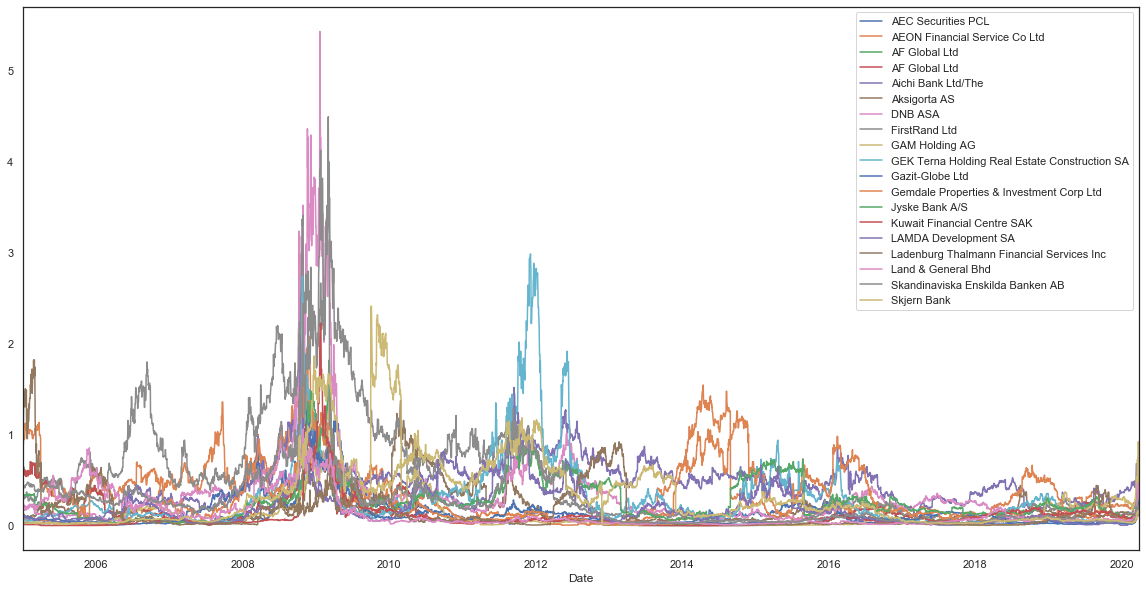

In [849]:
rating_3_df.plot(figsize=(20,10))

In [850]:
del rating_4_df['Alpha Bank AE']

In [851]:
del rating_4_df['Arlington Asset Investment Corp']

In [852]:
del rating_4_df['Aplus Financial Co Ltd']

In [853]:
del rating_4_df['Ashford Hospitality Trust Inc']

In [854]:
del rating_4_df['Akbank T.A.S.']

In [855]:
del rating_4_df['Alliance Data Systems Corp']

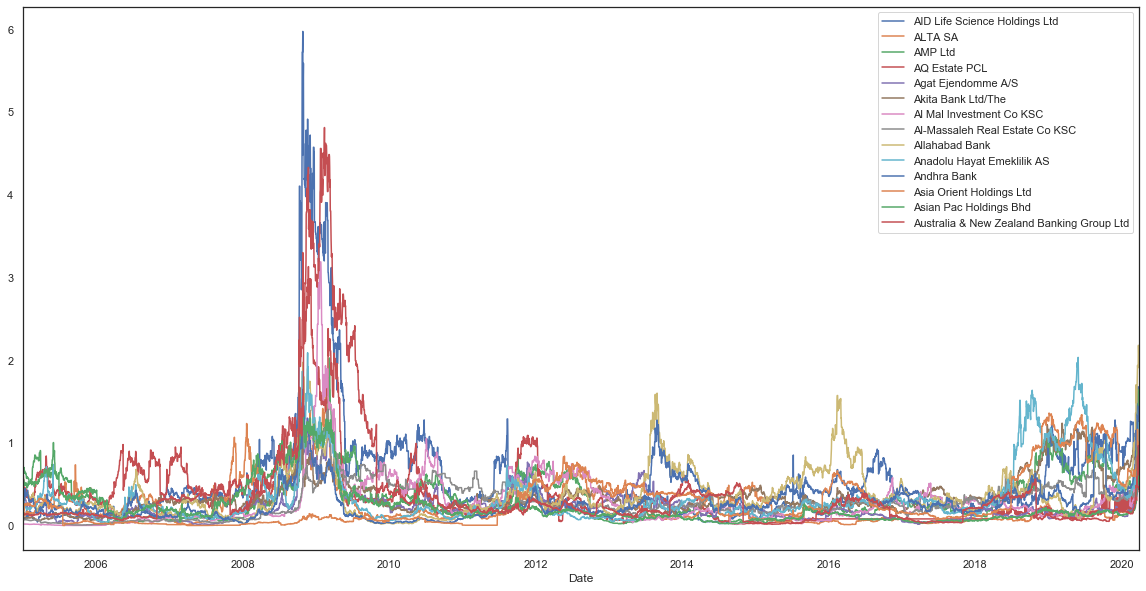

In [856]:
rating_4_df.plot(figsize=(20,10))

In [857]:
del rating_5_df['Beijing Homyear Capital Holdings Co Ltd']

del rating_5_df['Askari Bank Ltd']

del rating_5_df['Jilin Cheng Cheng Group Co Ltd']

del rating_5_df['DongfengSci-Tech Group Co Ltd']

del rating_5_df['Tianjin Songjiang Co Ltd']

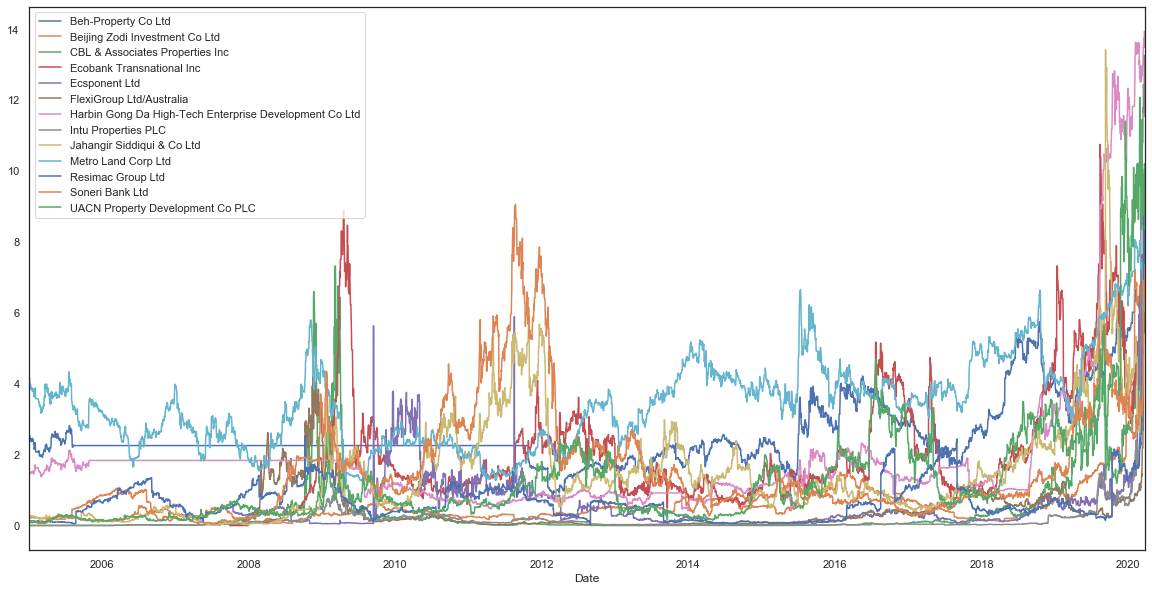

In [858]:
rating_5_df.plot(figsize=(20,10))

### Data Characteristic 

In [859]:
#Plot Average level of Default Probabilits in the data sef
comb_data = pd.concat([rating_1_df,rating_2_df,rating_3_df,rating_4_df,rating_5_df],axis=1)
average_all_level = comb_data.mean(axis=1)

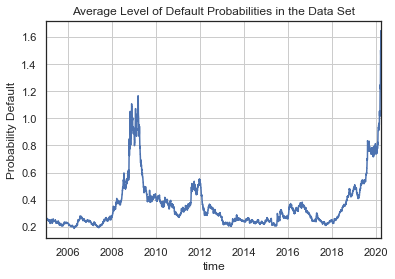

In [860]:
average_all_level.plot()
plt.title('Average Level of Default Probabilities in the Data Set')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.show()

In [861]:
final_data =pd.concat([rating_1_df.mean(axis=1), rating_2_df.mean(axis=1), rating_3_df.mean(axis=1), rating_4_df.mean(axis=1), rating_5_df.mean(axis=1)], axis=1)

In [862]:
final_data.columns = ['Rating ' + str(i) for i in range(1, 6)]

In [863]:
# #plot Avarage Level of Defaut Probabilities in Each Rating Class
# final_data = None
# for i in range(1,6):
#     col_name = 'Rating '+str(i)
#     data_df = pd.DataFrame(data=(comb_data.iloc[:,(i-1)*20:20*i ]).mean(axis=1),columns=[col_name])
# #     data_df.rename(columns={data_df.columns[0]:col_name})
# #     data_df = data_df.mean(axis=1)
#     final_data = pd.concat([final_data,data_df],axis=1)


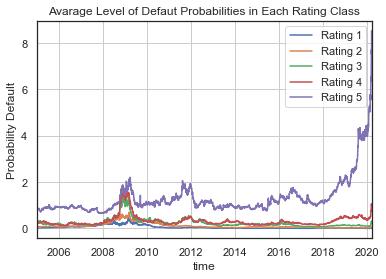

In [864]:
final_data.plot()
plt.title('Avarage Level of Defaut Probabilities in Each Rating Class')
plt.ylabel('Probability Default')
plt.xlabel('time')
plt.grid()
plt.legend()
plt.show()

In [865]:
def describe_data(data_df):
    col_name = ['Min','Max','Mean','Std','Skew','Kurtosis']
    lomo_df = pd.DataFrame(data_df.count().T,columns=['Count'])
    for function in col_name:
        lomo_df[function] = data_df.apply(str.lower(function))
    return lomo_df

In [866]:
level_df = describe_data(final_data)
level_df

,Count,Min,Max,Mean,Std,Skew,Kurtosis
Rating 1,5564,0.002512,0.523409,0.055255,0.073854,1.988850,4.073639
Rating 2,5564,0.020139,0.695444,0.116384,0.115571,2.049627,3.834750
Rating 3,5564,0.071236,1.404445,0.240962,0.192968,3.156489,11.886562
Rating 4,5564,0.113483,1.761844,0.323113,0.233325,3.406408,13.390192
Rating 5,5564,0.643280,8.534471,1.311013,0.789486,3.642226,17.101997


In [867]:
change_df = final_data.diff().apply(np.abs).dropna(axis=0)
change_df_summary = describe_data(change_df)
change_df_summary

,Count,Min,Max,Mean,Std,Skew,Kurtosis
Rating 1,5563,0.0,0.076438,0.001380,0.004270,7.407741,80.634050
Rating 2,5563,0.0,0.217752,0.001875,0.005734,13.947482,395.112278
Rating 3,5563,0.0,0.167712,0.004304,0.010746,7.534218,77.075878
Rating 4,5563,0.0,0.264216,0.005128,0.011580,8.751280,125.453929
Rating 5,5563,0.0,1.015507,0.015913,0.035517,10.241096,187.851844


### kendall's tau

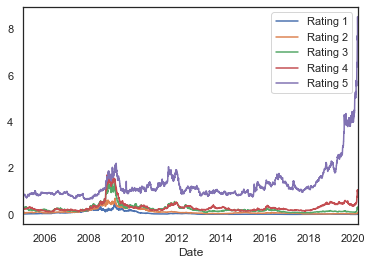

In [868]:
final_data.plot()

In [869]:
#for PD levels
final_data.corr(method='kendall')

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Rating 1,1.000000,0.600873,0.546540,0.255161,-0.136631
Rating 2,0.600873,1.000000,0.637022,0.086387,-0.167235
Rating 3,0.546540,0.637022,1.000000,0.305471,-0.034835
Rating 4,0.255161,0.086387,0.305471,1.000000,0.391641
Rating 5,-0.136631,-0.167235,-0.034835,0.391641,1.000000


In [870]:
#for PD changes
change_df.corr(method='kendall')

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5
Rating 1,1.000000,0.643388,0.603546,0.535001,0.437154
Rating 2,0.643388,1.000000,0.602197,0.519604,0.456567
Rating 3,0.603546,0.602197,1.000000,0.562633,0.472512
Rating 4,0.535001,0.519604,0.562633,1.000000,0.505664
Rating 5,0.437154,0.456567,0.472512,0.505664,1.000000


### Asymmetric correlation for every pair of rating classed in the data 

In [871]:
data_df = final_data

In [872]:
data_df = (data_df - data_df.mean())/data_df.std()

In [873]:
def get_quantile_df(group_1, group_2, exceedance_level):
    if exceedance_level < 0.5:
        return data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level > 0.5:
        return data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level == 0.5:
        a = data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        b = data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        return a, b

In [874]:
def asymmetric_corr(data_df):
    rating_class = data_df.columns
    count = 0

    plt.figure(figsize=(20,20))
    for i in range(len(rating_class)):

        for m in range(i+1,len(rating_class)):
            result_list = []
            rating_1 = data_df[rating_class[i]]
            rating_2 = data_df[rating_class[m]]
            title = rating_class[i] + ' & ' + rating_class[m]
            for q in np.arange(0.1,1,0.1):
                if q == 0.5:
                    a, b = get_quantile_df(rating_class[i], rating_class[m], q)
                    result_list.append(a.corr().values[0][1])
                    result_list.append(b.corr().values[0][1])
                else:
                    result_list.append(get_quantile_df(rating_class[i], rating_class[m], q).corr().values[0][1])
            count +=1
            loc= int(str(33)+str(count))
            if count==10:
                plt.figure(figsize=(4,4))
            else:
                plt.subplot(loc)
#             plt.plot(np.arange(0.1,1,0.1),result_list)
            plt.plot(list(np.arange(0.1,0.6,0.1)) + list(np.arange(0.5,1,0.1)), np.abs(result_list), '*-')
            plt.title(title)
            plt.xlabel('Exceedance Level')
            plt.ylabel('Conditional Probability')

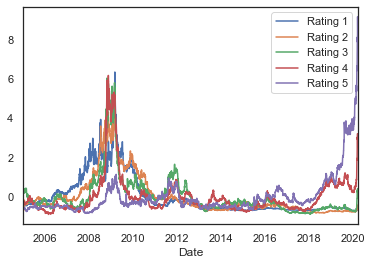

In [875]:
data_df.plot()

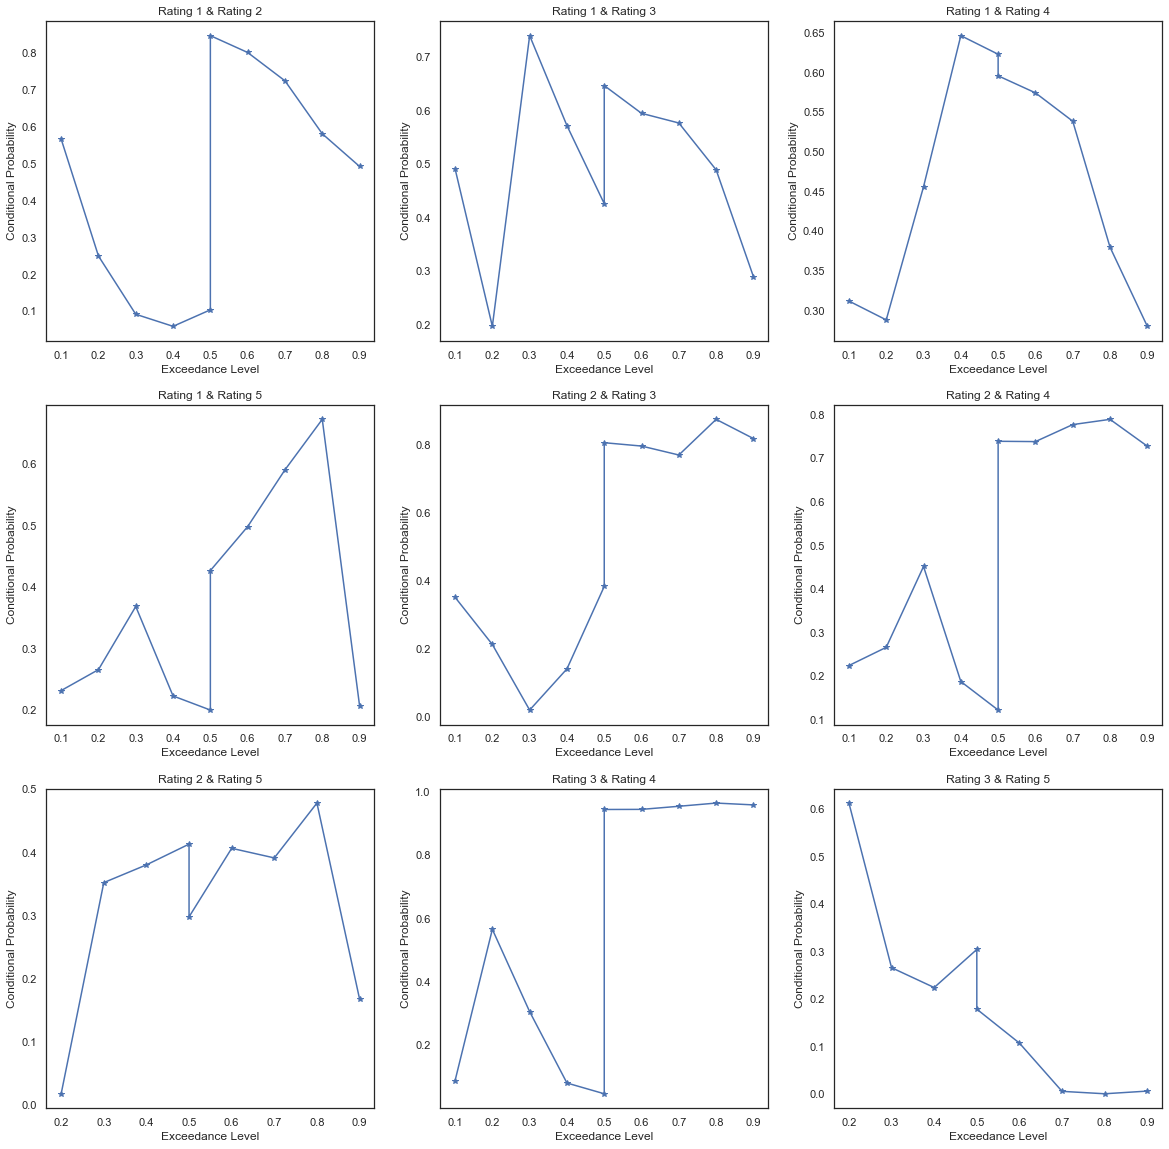

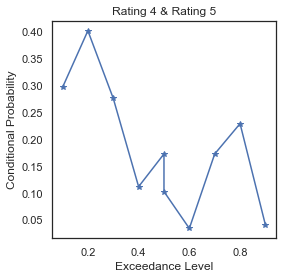

In [876]:
asymmetric_corr(data_df)

In [877]:
def get_quantile_df(group_1, group_2, exceedance_level):
    if exceedance_level < 0.5:
        return data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level > 0.5:
        return data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif exceedance_level == 0.5:
        a = data_df.loc[(data_df[group_1] < data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        b = data_df.loc[(data_df[group_1] > data_df[group_1].quantile(exceedance_level)) & (data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
        return a, b

In [878]:
def get_tail_dependence(group_1, group_2, exceedance_level, method):
    if method == 'lower':
        temp_df = data_df.loc[(data_df[group_2] < data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    elif method =='upper':
        temp_df = data_df.loc[(data_df[group_2] > data_df[group_2].quantile(exceedance_level)), [group_1, group_2]]
    return temp_df.corr().values[0][1]
#     return temp_df

In [879]:
tail_dependence_df = pd.DataFrame(columns=['group_1', 'group_2', '10%', '20%', '30%', '70%', '80%', '90%'])
count = 0
for i, group_1 in enumerate(data_df.columns):
    
    for j, group_2 in enumerate(data_df.columns[i+1:]):
        row = [group_1, group_2]
        
        for exceedance_level in [0.1, 0.2, 0.3, 0.7, 0.8, 0.9]:

            if exceedance_level < 0.5:
                method = 'lower'
            elif exceedance_level > 0.5:
                method = 'upper'
            
            tail_dependence_value = get_tail_dependence(group_1, group_2, exceedance_level, method)
            row.append(tail_dependence_value)
            
        tail_dependence_df.loc[count, :] = row
        count += 1

In [880]:
tail_dependence_df

,group_1,group_2,10%,20%,30%,70%,80%,90%
0,Rating 1,Rating 2,0.0108973,0.419373,-0.0201765,0.801473,0.632273,0.574783
1,Rating 1,Rating 3,0.413207,0.418929,0.415827,0.608383,0.50231,0.529939
2,Rating 1,Rating 4,-0.195247,-0.108112,0.00131206,0.590229,0.643854,0.58575
3,Rating 1,Rating 5,-0.608135,-0.560503,-0.567411,-0.164802,-0.281473,-0.245264
4,Rating 2,Rating 3,0.143958,0.0334842,0.24037,0.762252,0.712239,0.733049
5,Rating 2,Rating 4,-0.0532639,-0.016238,0.118118,0.679164,0.734277,0.713001
6,Rating 2,Rating 5,-0.473722,-0.386036,-0.401643,-0.221579,-0.305705,-0.193922
7,Rating 3,Rating 4,-0.0425406,-0.131105,0.0420605,0.848435,0.886576,0.912241
8,Rating 3,Rating 5,-0.0976384,-0.115914,-0.133225,-0.206298,-0.32666,-0.191269
9,Rating 4,Rating 5,-0.0923419,-0.0800311,-0.0109966,0.106631,-0.0813829,-0.0165622
